# Lab 3: Advanced classification models: Support Vector machines: SVMs

In a previous session, we introduced **logistic regression** as a simple classification model. Logistic regression is an extension of linear regression and tries to find a separating **hyperplane** between datapoints from different classes. Depending on the side that a datapoint lies at, it is classified as a positive or a negative example. The distance of the point to the **decision boundary** is the output of the model and is rescaled to [0, 1] using the sigmoid function. To train our logistic regression model, we used all our training data to find the separator which maximizes the total confidence in our classification, summed over all the points. The further the training data lies at the correct size of the decision boundary, the better the solution is according to the logistic regression model.

**Support Vector Machines (SVMs)** follow a different rule to define the best separating hyperplane. In the images below, we have the two different classes and some valid separating lines between them. All three lines are able to perfectly separate the training data but depending on which line we use, the new point will get a different label. Which line is better ? SVMs try to find the **maximum margin separator** between the two classes. This is the line that lies the furthest from the nearest training data points. SVM calculates the distance to the closest datapoint for each possible line and picks the one with the highest distance. This makes an SVM a **maximum margin estimator**.
The margin forms a **hyper-cylinder** around the decision boundary.

<div>
    <div style="float:left">
        <img src="images/image0.png" width="450" />
    </div>
    <div style="float:left">
        <img src="images/image1.png" width="450"/>
    </div>
    <div style="float:left">
        <img src="images/image2.png" width="450"/>
    </div>
    
    Source:https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
</div>

The optimal line lies in the middle of a **channel**, a distance *d* away from the nearest positive and negative point. This means that the separating channel is defined by a few positive and negative points that are close to the line. This is different from logistic regression where all the points contribute to the cost of the line. In SVMs, these contact points are the **support vectors** defining the channel. 

<img src="images/svm.png" width="450" style="float:left"/>

The mathematical formulation of the line is $\mathbf{w^Tx} + b$ where $\mathbf{w}$ is the **weight matrix**, *T* indicates the transpose, $\mathbf{x}$ is the input sample and $b$ is the **bias**. Any $\mathbf{x}$ that gives a positive value for $\mathbf{w^Tx} + b$ is above the line, points with a negative value are below the line. To take the **margin M** into account we modify this and assign the positive class to all points that have $\mathbf{w^Tx} + b \geq \text{M}$ and a negative class to points that have $\mathbf{w^Tx} + b \leq \text{-M}$. The separating plane is defined by $\mathbf{w^Tx} + b = 0$. 

To make the formulation easier we use 1 and -1 as the targets for the positive and negative class respectively. With $t$ the target and $y$ the prediction, we can calculate $t*y$ to find whether the prediction is correct. This product will be positive if the prediction is correct and negative otherwise.

To train our SVM we then need to solve the following **optimization problem**:

$ max ||w||, \text{where } y_i(\mathbf{w^Tx} + b) \geq 1 \text{ for all }1 \leq i < n$

This is typically solved with **quadratic programming techniques**.


## Soft-margin SVMs
In most real problems, it is not possible to find this perfect separating plane. What if our data instead looks like the image below where there is some overlap between the datapoints. To handle this case, we can allow the SVM to **soften** the margin. We then allow some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as **C**. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points. This transforms our SVM into a **soft-margin** classifier since we are allowing for a few mistakes. C is a **hyperparameter** that needs to be tuned for your specific dataset and use case.

<div>
    <div style="float:left">
        <img src="images/noisy.png" width="450" />
    </div>
    <div style="float:left">
        <img src="images/c.png" width="900"/>
    </div>    
    
    
    Source:https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
</div>

## Non-linear SVMs
The SVM as explained before is not that different from the logistic regression model since it also tries to find a straight line separating the classes (a **hyperplane** in multiple dimensions). Most problems are however **non-linear**. For these problems the datapoints can not be separated by a straight line anymore and linear models will perform badly. The key to allow linear models to work on non-linear data is to **transform** the data. The data is then mapped to a new space by doing a nonlinear transformation of the data. A good transformation then allows for linear separation in this new space. For the data below, we could for example calculate the distance to the origin for each datapoint and use this as a **derived featured**. This will work well if we have some **domain knowledge** to do **feature design** but this is not always the case. In the general case, we transform the data into a higher dimensional space where a linear separation is good enough. There are many possible transformation functions. A two dimensional point $\mathbf{x}=\{x_1, x_2\}$ could for example be mapped to the five dimensional point $\phi(\mathbf{x})=\{x_1, x_2, x_1^2, x_2^2,x_1x_2\}$.

<div>
    <div style="float:left">
        <img src="images/nonlinear.png" width="600" />
    </div>
    <div >
        <img src="images/nonlinear2.png" width="600"/>
    </div>
</div>


The naive way to do this is to transform every datapoint in our dataset explicitly. But this will be unfeasible because of the high computational burden due to the high dimensionality of the transformed data. Luckily, there are special types of functions that we can use to avoid transforming every datapoint explicitly, instead these functions calculate the transformation implicitly. This is known as the **kernel trick** and saves us a lot of time and computation. Without going into the details, these kernels allow us to calculate the **dot product** of transformed datapoints in an efficient way, without having to calculate the transformations beforehand. This dot product is an essential part of the SVM training.

Given two datapoints $\mathbf{x} = \{x_1, x_2, x_3\} = \{1, 2, 3\}\text{ and } \mathbf{y} = \{y_1, y_2, y_3\} = \{4, 5, 6\}$ and a kernel function $f(x) = \{x_1x_1, x_1x_2, x_1x_3, x_2x_1, x_2x_2, x_2x_3, x_3x_1, x_3x_2, x_3x_3\}$ we could first transform our datapoints into $f(\mathbf{x}) = \{1, 2, 3, 2, 4, 6, 3, 6, 9\} \text{ and } f(\mathbf{y}) = \{16, 20, 24, 20, 25, 30, 24, 30, 36\}$ and then calculate our dot product $f(\mathbf{x}) \cdot f(\mathbf{y}) = 1024$. This is a lot of computation to go from the three-dimensional space to the nine-dimensional space, just to calculate a single number. Thanks to the kernel trick we can calculate this result directly without doing the transformation. For our kernel this is obtained by $(\mathbf{x} \cdot \mathbf{y})^2 = 32^2 = 1024$. To summarize, the kernel trick gives us a shortcut to calculate the dot product of transformed vectors without having to do the transformations explicitly.

There has gone much research into designing powerful kernel functions. Some of the more popular choices include **Polynomial kernels**, **sigmoid functions** and **Radial basis functions (RBF)**. Most implementations allow you to try multiple kernels. The optimal choice depends on you dataset and the problem. The choice of the kernel, together with some configuration parameters such as the **degree of the polynomial kernel** are **hyperparameters** that you need to tune.

## Multi class classification
**Multi class classification** refers to a task where each data point belongs to one of *n* classes. The special case of *n=2* is called **binary classification**. Visually, multi class classification tries to separate the input space in zones belonging to one of the classes. Different classification algorithms differ in how they are able to define these zones. SVMs by construction only work for binary classification. There are different ways to generalize them for **N-class classification**. The most straight-forward is to construct *N* SVMs where each one distinguishes between a single class and all other classes. We then just return the prediction of the SVM where the point lies the furthest into the positive region. 

<div>
    <div style="float:left">
        <img src="images/mc.png" width="600" />
    </div>
    Source: http://www.37steps.com/exam/mclassification/html/mclassification.html
</div>

# Assignment
We will now use an SVM to for a **face recognition task**. We will use the Labeled Faces in the Wild dataset (http://vis-www.cs.umass.edu/lfw/), which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn. We will take a subset of the dataset containing only the persons with more than 75 images. The resulting subset is **unbalanced**, as you can see from the histogram.

<font color='red'>Task: What are pitfalls of working with an unbalanced dataset for classification? How could you avoid this ? </font>

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Tony Blair']
(1217, 62, 47)


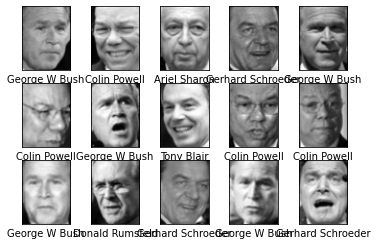

C:\Users\noot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


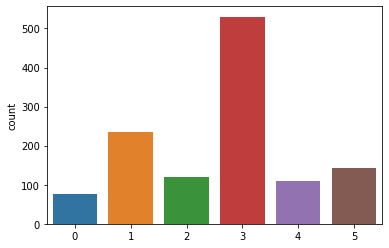

In [1]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns 
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,16

%matplotlib inline

faces = fetch_lfw_people(min_faces_per_person=75)

print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

sns.countplot(faces.target)
plt.show()

## Image feature extraction
Machine learning models typically expect a one dimensional feature vector as input. Each image contains 62×47 or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature. This might work for relatively small images but will not scale to higher resolutions. Even worse is the fact that we lose a lot of spatial information by reducing the 2D image to a flat 1D vector. Individual pixels are not completely independent: there is a lot of information contained in the relation between two neighboring pixels, but flattening would remove this information.

We will therefore manually craft other features. This step is called **feature extraction** on the input images. This reduces the dimensionality to something more suitable for a machine learning model. There are a lot of feature extraction algorithms for images such as **SIFT, SURF** and **HOG**. Typically, they look for edges or color transitions that might be useful for the machine learning task. The code below uses the **histogram of oriented gradients** (HOG) algorithm to extract features.

The core idea behind HOG features is to describe the image as a set of edge directions within a part of the image. The image is divided into small connected regions called cells, and for the pixels within each cell, a histogram of gradient directions is compiled. These measure how much the pixel intensities change in each direction. For improved accuracy, the local histograms can be contrast-normalized by calculating a measure of the intensity across a larger region of the image, called a block.

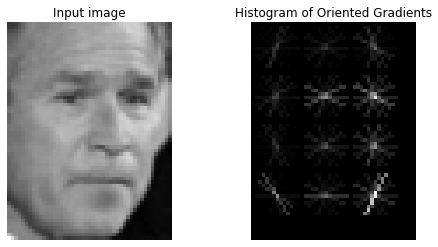

feature shape:  (216,)


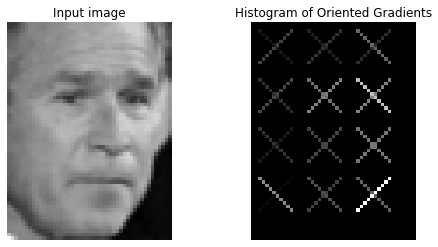

feature shape:  (48,)


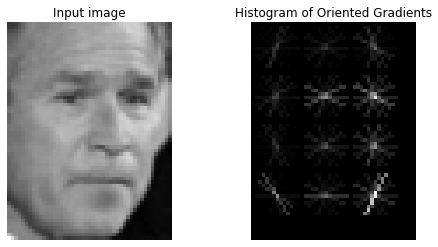

feature shape:  (108,)


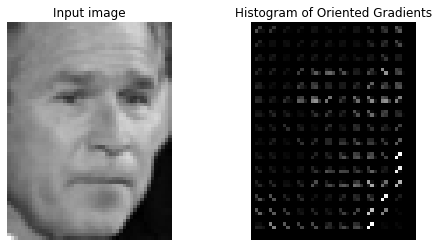

feature shape:  (5040,)


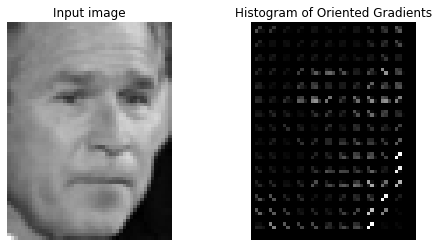

feature shape:  (13824,)


In [2]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from skimage import exposure

def visualize(image, orientations, pixels_per_cell, cells_per_block):
    fd, hog_image = hog(image, orientations=orientations, pixels_per_cell=(pixels_per_cell, pixels_per_cell), cells_per_block=(cells_per_block, cells_per_block), visualize=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()
    print("feature shape: ",fd.shape)
    
visualize(faces.images[0], 9, 14, 2)
visualize(faces.images[0], 2, 14, 2)
visualize(faces.images[0], 9, 14, 1)
visualize(faces.images[0], 9, 4, 2)
visualize(faces.images[0], 9, 4, 4)

In [3]:
hog_features = []
for image in faces.images:
    h = hog(
        image, pixels_per_cell=(14,14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        visualize=False, 
        block_norm='L2-Hys')
    hog_features.append(h)
hog_features = np.stack(hog_features)

## The models
We will first split our data into a train and a test set. You will train your model on the first part, and evaluate its performance on the test set. The reason for this will be explained later.


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(hog_features, faces.target, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

912
305
912
305


<font color='red'>Train a linear SVM using LinearSVC of scikit-learn on your training data and calculate the accuracy on your test set.</font>

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.LinearSVC()
classifier.fit(X_train, Y_train)
test_predictions = classifier.predict(X_test)
print(accuracy_score(Y_test, test_predictions))

0.819672131147541


<font color='red'>Task: Train a SVM with RBF-kernel on this data and calculate the accuracy. To use non-linear kernels, you have to use sklearn.svm.SVC estimator.</font>

In [6]:
classifier = svm.SVC(kernel="rbf")
classifier.fit(X_train, Y_train)
test_predictions = classifier.predict(X_test)
print(accuracy_score(Y_test, test_predictions))

0.839344262295082


<font color='red'>Task: Compare your accuracy with the accuracy of three other simple models: 1) a classifier that just uniformly random selects one of the classes without looking at the input; 2) a classifier that always returns the most frequent class of the training set, 3) a KNeighborsClassifier. Does your SVM perform (much) better?</font>

In [7]:
# a model returning random predictions would result in 16.67% accuracy (if it was perfectly balanced)
print(accuracy_score(Y_test, np.cast["int32"](np.random.uniform(low=0, high=6, size=Y_test.shape))))

# a model always returning the most common class would result in 44% accuracy
print(np.mean(Y_test == 3))
print(accuracy_score(Y_test, [3]*len(Y_test)))

# As a baseline you can try a simple classifier like nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
test_predictions = knn.predict(X_test)
print(accuracy_score(Y_test, test_predictions))

0.20655737704918034
0.4360655737704918
0.4360655737704918
0.8131147540983606


## Performance evaluation
In the previous sessions we already introduced several performance metrics such as **accuracy**, **precision**, **Recall**, **f1-score**. These metrics are calculated over all classes.. But this average may hide important information: maybe your model is performing very well on some classses but has a low accurac on instances of another class. With multiclass classification, it is useful to inspect the **confusion matrix** that shows how many datapoints for each class were classified as each other class. This often gives us good insight into the performance of the model. It is a good sign if the mistakes make sense. It is for example less of a problem if our model confuses cats and dogs than if it confuses cats and cars.

<font color='red'>Task: Calculate and show the confusion matrix, using the method in the sklearn.metrics module</font>

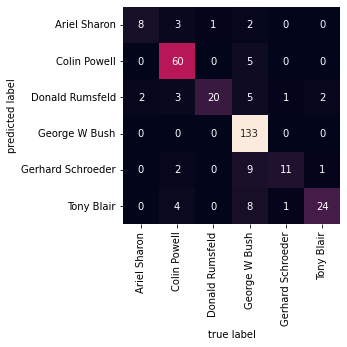

In [8]:
from sklearn.metrics import confusion_matrix

classifier = svm.SVC(kernel="rbf")
classifier.fit(X_train, Y_train)
test_predictions = classifier.predict(X_test)

mat = confusion_matrix(test_predictions, Y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Hyperparameter tuning
Like with most machine learning algorithms the performance of an SVM depends on the choice of suitable **hyperparameters**. Hyperparameters are parameters of the model that are not learned from data but that are configured by the developer. Examples of hyperparameters are the "K" in K-nearest neighbours, the number of principal components in PCA and the kernel type and C parameter in SVMs. A machine learning model typically has more than one hyperparameters that interact with each other in complex ways. You can not just tune one parameter at a time because when you change another parameter, the optimal value for the first one will change. You can experiment with different hyperparameter settings manually and compare the score on your **validation** set to decide which ones are the most suitable or you can programmatically compare a whole set of different parameters using a **grid search** or **random search**.
- A **grid search** systematically tries out every possible combination in a certain range. 
- A **random search** tries out random combinations of all those hyperparameters

Surprisingly, a random search typically results in better performance. The figure below might give you some intuition as to why this is the case. If the model has two hyperparameters where only one is important (which we don't know yet). If we use a grid search with 9 combinations, we effectively only explore three different models while the random search explores nine different models. Hyperparameter tuning is extremely expensive since every trial requires training a model from scratch. It is not uncommon for models to require days or weeks of training on big datasets so there is much interest in more clever ways to do hyperparameter tuning such as **bayesian optimization**  

<div style="float:left">
        <img src="images/search.png" width="600"/>
        <br >
        Source: https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85
</div> 

## Overfitting
The goal of machine learning is to build models that learn from data and that are able to make accurate predictions about new, unseen data. It is therefore crucial to **generalize** to new data. The model needs to capture the underlying factors of the data to do this. It is not enough to accurately capture the information of the training data. The model needs to do this in a way that generalizes to the unseen data. A big problem in machine learning is **overfitting** where a powerful model has learned all the characteristics of the training data including the noise and is unable to make accurate predictions for the test data. The opposite of overfitting is **underfitting** where the model has not enough degrees of freedom to model the data.

<div style="float:left">
        <img src="images/overfitting.png" width="600"/>
        <br >
        Source: https://towardsdatascience.com/underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6fe4a8a49dbf
</div> 

## Cross validation
So how do we tune all the parameters and hyperparameters of the model while making sure that we are not overfitting to the training data ? The first step is always to split of a **training set** and  a **test set**. The test set is set aside and is not to be touched until the model is trained. The performance of the **test set** gives us an indication of the generalization of the model when it will go in production.

Training our model on the **training set** will give us values for the trainable parameters. But how would you choose the optimal value for the hyperparameters, such as C in the SVM? Likely, you will try with a grid search several values of C, and pick the best one. In fact, you run the risk that you are (manually) overfitting to the **test set**.

We can avoid this overfitting just like we avoided overfitting for the trainable parameters: by keeping some data aside. Since our **test set** is not to be touched until we have a final model, which includes the values of the hyperparameters, we will reserve a portion of our **training data** to act as **validation set**.
To tune the hyperparameters, we train different models on the (remaining) train set and compare their performance on the validation set. Once we have identified a suitable model, we can evaluate that model on the test set to get the final performance. Typical splits are 60% trainings data, 20% validation data and 20% test data although this depends on the dataset size and the problem at hand.

The performance of machine learning models depends greatly on the quality and size of the data. The more training data, the better (usually). If we have a small dataset and we split off a test and validation set, then there might not be enough data left to train a good model. When the dataset is small, it is also possible to select a very easy or a very hard test set, just by accident which would result in a very optimistic of pessimistic performance estimation. The most common solution to solve this is **cross validation**. With this approach, you still set aside a test set, but there is no longer a validation set. Typically, **K-fold cross validation** performs the following procedure on the training data:

- Split your entire dataset into K **folds**. Each datapoint is assigned to a fold and stays in this fold for the entire procedure.
- For each fold:
    - Train a model on all other folds as the training data
    - Evaluate your model by measuring performance on the held-out fold
- Report the average performance over all **K-1** models. 
- Use this average performance when doing a grid search or random search for your hyperparameters.

So, for each possible value of your hyperparameter, you train **K-1** models and measure their performance on a different test set. This way, you reduce the risk of overfitting to one particular test set.

<div>
        <img src="images/cv.png" width="600"/>
        <br >
        Source: https://towardsdatascience.com/validating-your-machine-learning-model-25b4c8643fb7
</div>

<br/><br/>
Each fold is used one time as to evaluate performance and K-1 times as training data. Typical values for K are 5 or 10. In the most extreme case, we can perform **leave-one-out** cross validation where the algorithm is tested on just a single point and trained on all other points. This is then repeated for every datapoint in the dataset. Since cross validation involves training multiple models, it can be very expensive for large models or large datasets. The good thing about cross validation or grid search is that every run is independent so it is relatively easy to parallelize . 

The approach described above is called **non-nested cross validation**. The drawback is that we have now used all data when training, so we still have some form of bias to our dataset. If you have sufficient data, it is therefore better to split a test set before starting cross-validation, as in the picture below.

<br/><br/>
<div>
        <img src="images/grid_search_cross_validation.png" width="600"/>
        <br >
        Source: https://scikit-learn.org/stable/modules/cross_validation.html
</div>

<br/><br/>
If you want to further reduce the risk, you should run **nested cross-validation**, meaning that you select several times a test set. We will not study this setting.

<font color='red'>Task: Both cross validation and grid search/random search are implemented in scikit-learn (https://scikit-learn.org/stable/modules/grid_search.html). Perform a grid search with cross validation on your training data. Explore different C values and kernels in your grid search. Evaluate your performance on your test set.<font>

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [20, 10, 5, 1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
 ]

classifier = svm.SVC()
search = GridSearchCV(classifier, param_grid, cv=5)
search.fit(X_train, Y_train)
print(search.best_params_)

model = search.best_estimator_
test_predictions = model.predict(X_test)
print(accuracy_score(Y_test, test_predictions))

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.8950819672131147


<font color='red'>Task: Print out the results attribute of the grid search. What do they mean ?.<font>

In [10]:
print(search.cv_results_)

{'mean_fit_time': array([0.04359808, 0.04579821, 0.04819698, 0.05119958, 0.12300429,
       0.12239399, 0.1177958 , 0.07119703, 0.05799632, 0.06279626,
       0.06699638, 0.06580491, 0.06039929, 0.05699811, 0.12697177,
       0.13160095, 0.12259569, 0.08459935, 0.06299767, 0.05139966,
       0.0625958 , 0.06519375, 0.06480012, 0.05959821, 0.12659941,
       0.12259769, 0.12049303, 0.08340316, 0.0626008 , 0.05080605,
       0.04779825, 0.06119986, 0.06639967, 0.0639936 , 0.12920241,
       0.12499995, 0.11879582, 0.08320007, 0.06460185, 0.0498003 ,
       0.04899831, 0.04539824, 0.06119976, 0.06956129]), 'std_fit_time': array([0.00241648, 0.00462188, 0.00193993, 0.00160037, 0.00218354,
       0.00627224, 0.00337012, 0.00604923, 0.0010967 , 0.00305978,
       0.00251032, 0.00116778, 0.00366501, 0.00167183, 0.00496563,
       0.0074427 , 0.01061668, 0.00361119, 0.00533439, 0.00135512,
       0.00382439, 0.00074114, 0.00116661, 0.00344064, 0.00249967,
       0.0011935 , 0.00525804, 0.00287

<font color='red'>Task: How many models have been trained in total ?<font>

In [11]:
print(len(search.cv_results_["params"])*5)

220


Picking suitable range for hyperparameters requires experience and a good understanding of the algorithm. If you find hyperparameters that are at the edge of your search domain, it is probably a good idea to expand the search further.

The number of principal compontents is also a hyperparameter that we should tune. The code below builds a **pipeline** that includes both the HOG feature extraction and SVM classifier. We wrote a custom transformer class to perform the feature extraction. This allows us to tune the feature extraction hyper parameters together with those of the classification model.

In [12]:
from sklearn.pipeline import make_pipeline

from sklearn.base import BaseEstimator, TransformerMixin

class HogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pixels_per_cell, cells_per_block, orientations):
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.orientations = orientations
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        output = []
        for image in X:
            h = hog(
            image, pixels_per_cell=(self.pixels_per_cell,self.pixels_per_cell), 
            cells_per_block=(self.cells_per_block, self.cells_per_block), 
            orientations=self.orientations, 
            visualize=False, 
            block_norm='L2-Hys')
            output.append(h)
        return np.stack(output)

pca = HogTransformer(5, 14, 9)
svc =svm.SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

model.get_params()

{'memory': None,
 'steps': [('hogtransformer',
   HogTransformer(cells_per_block=14, orientations=9, pixels_per_cell=5)),
  ('svc', SVC(class_weight='balanced'))],
 'verbose': False,
 'hogtransformer': HogTransformer(cells_per_block=14, orientations=9, pixels_per_cell=5),
 'svc': SVC(class_weight='balanced'),
 'hogtransformer__cells_per_block': 14,
 'hogtransformer__orientations': 9,
 'hogtransformer__pixels_per_cell': 5,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': 'balanced',
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

The input of our combined model is now the raw images, the HOG feature extraction in automatically performed as a first step in our pipeline.

In [13]:
faces = fetch_lfw_people(min_faces_per_person=75)
X_train, X_test, Y_train, Y_test = train_test_split(faces.images, faces.target, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

912
305
912
305


<font color='red'>Task: Optimize the hyperparameters of this combined model.<font>

In [14]:
param_grid = [
  {
       'svc__C': [10],
       'svc__gamma': [0.1],
       'svc__kernel': ['rbf'],
       'hogtransformer__cells_per_block': [1, 3],
       'hogtransformer__orientations': [5, 11, 14],
       'hogtransformer__pixels_per_cell': [5, 10, 14]
  }
 ]
search = GridSearchCV(model, param_grid, cv=2)
search.fit(X_train, Y_train)
print(search.best_params_)

model = search.best_estimator_
test_predictions = model.predict(X_test)
print(accuracy_score(test_predictions, Y_test))

{'hogtransformer__cells_per_block': 3, 'hogtransformer__orientations': 11, 'hogtransformer__pixels_per_cell': 10, 'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.9049180327868852


<font color='red'>Task: Show the confusion matrix for the best model you found.</font>

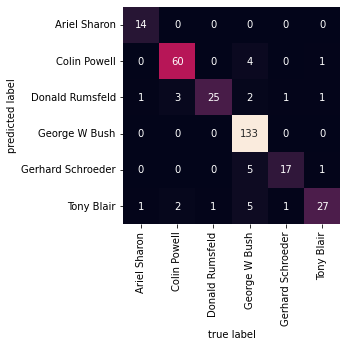

In [15]:
mat = confusion_matrix(test_predictions, Y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

<font color='red'>Task: For many practical applications, we do not only care about the obtained accuracy but also about the training or inference (using a trained model for prediction) cost. If we change the hyper parameters of the HOG feature extraction, we also change the input dimensionality for the SVM. This will have a hug impact on the execution time. Show a histogram of the execution times for the different models in our grid search.<font>

<BarContainer object of 18 artists>

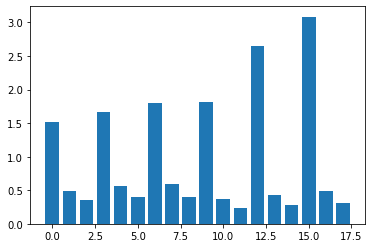

In [16]:
plt.bar(x=range(len(search.cv_results_["params"])), height=search.cv_results_["mean_score_time"])

## Optional: larger dataset
We now used a subset of the Labeled Faces in the Wild (LFW) people dataset (http://vis-www.cs.umass.edu/lfw/). Train a model that is able to recognize more than five different faces. This is an **unbalanced dataset** it might be necessary to assign more weight to the underrepresented classes (using the *class_weight* attribute in scikit-learn).

## Remarks
- We used SVMs for classification but it is also possible to use them for regression: https://www.saedsayad.com/support_vector_machine_reg.htm or anomaly detection: https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html
- Because trained SVMs rely on relatively few support vectors, they are very compact models that take up very little memory. Once the model is trained, the prediction phase is also very fast.
- SVMs work well with high-dimensional data, which is challenging for other algorithms.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.
- SVMs do not scale very well with the number of training data points ($O(n^3)$ at worst, or $O(n^2)$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter C. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
- The idea of kernels and the kernel trick is not limited to SVMs. It is commonly used in other models such as **kernelized nearest neighbor classification**, **Kernelized K-means clustering**, **Kernelized PCA**, ...
- Face recognition and by extension image classification is a challenging field because of the high dimensional input data. The PCA features that we extracted in this session will not give state-of-the-art results. It is better to use specific image features extraction techniques such as **SIFT** or **HOG** features or to use models such as convolutional neural networks that are optimized to work with image input.